### For Ignore Warning

In [1]:
import warnings

from xgboost import XGBRegressor

warnings.filterwarnings("ignore")

# Suppress warnings from LightGBM
warnings.filterwarnings("ignore", category=FutureWarning, module="lightgbm")

# Suppress warnings from Scikit-learn
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

### Loading Dataset

In [2]:
import kagglehub
from pandas.core.interchange.dataframe_protocol import DataFrame

path = kagglehub.dataset_download("gauravmalik26/food-delivery-dataset/versions/1")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\hesha\.cache\kagglehub\datasets\gauravmalik26\food-delivery-dataset\versions\1


In [3]:
import pandas as pd

df = pd.read_csv(f"{path}/train.csv")

In [4]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

### Data Cleaning

In [6]:
df = df.drop(columns=["ID", "Delivery_person_ID"])

In [7]:
df["Time_taken(min)"] = df["Time_taken(min)"].apply(lambda x: x.split(" ")[1].strip())
df["Weatherconditions"] = df["Weatherconditions"].apply(lambda x: x.split(" ")[1].strip())

In [8]:
print(len(df[df.duplicated()])>0)

False


In [9]:
df['Delivery_person_Age'] = df['Delivery_person_Age'].astype(float)
df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].astype(float)
df['multiple_deliveries'] = df['multiple_deliveries'].astype(float)
df['Order_Date']=pd.to_datetime(df['Order_Date'],format="%d-%m-%Y")

In [10]:
for col in df.columns:
    print(col, df[col].value_counts())
    print()

Delivery_person_Age Delivery_person_Age
35.0    2262
36.0    2260
37.0    2227
30.0    2226
38.0    2219
24.0    2210
32.0    2202
22.0    2196
29.0    2191
33.0    2187
28.0    2179
25.0    2174
34.0    2166
26.0    2159
21.0    2153
27.0    2150
39.0    2144
20.0    2136
31.0    2120
23.0    2087
50.0      53
15.0      38
Name: count, dtype: int64

Delivery_person_Ratings Delivery_person_Ratings
4.8    7148
4.7    7142
4.9    7041
4.6    6940
5.0    3996
4.5    3303
4.1    1430
4.2    1418
4.3    1409
4.4    1361
4.0    1077
3.5     249
3.8     228
3.7     225
3.6     207
3.9     197
6.0      53
1.0      38
3.4      32
3.1      29
3.2      29
3.3      25
2.6      22
2.7      22
2.5      20
2.8      19
2.9      19
3.0       6
Name: count, dtype: int64

Restaurant_latitude Restaurant_latitude
 0.000000     3640
 26.911378     182
 26.914142     180
 26.902940     176
 26.902908     176
              ... 
-12.326356       1
-22.577821       1
-22.569367       1
-30.890184       1
-12.97

#### Handling Null Values

In [11]:
import numpy as np

def convert_nan(dataframe):
    dataframe.replace('NaN', float(np.nan), regex=True,inplace=True)

convert_nan(df)

In [12]:
df.isnull().sum().sort_values(ascending=False)

Delivery_person_Ratings        1908
Delivery_person_Age            1854
Time_Orderd                    1731
City                           1200
multiple_deliveries             993
Weatherconditions               616
Road_traffic_density            601
Festival                        228
Restaurant_latitude               0
Restaurant_longitude              0
Time_Order_picked                 0
Order_Date                        0
Delivery_location_latitude        0
Delivery_location_longitude       0
Type_of_vehicle                   0
Type_of_order                     0
Vehicle_condition                 0
Time_taken(min)                   0
dtype: int64

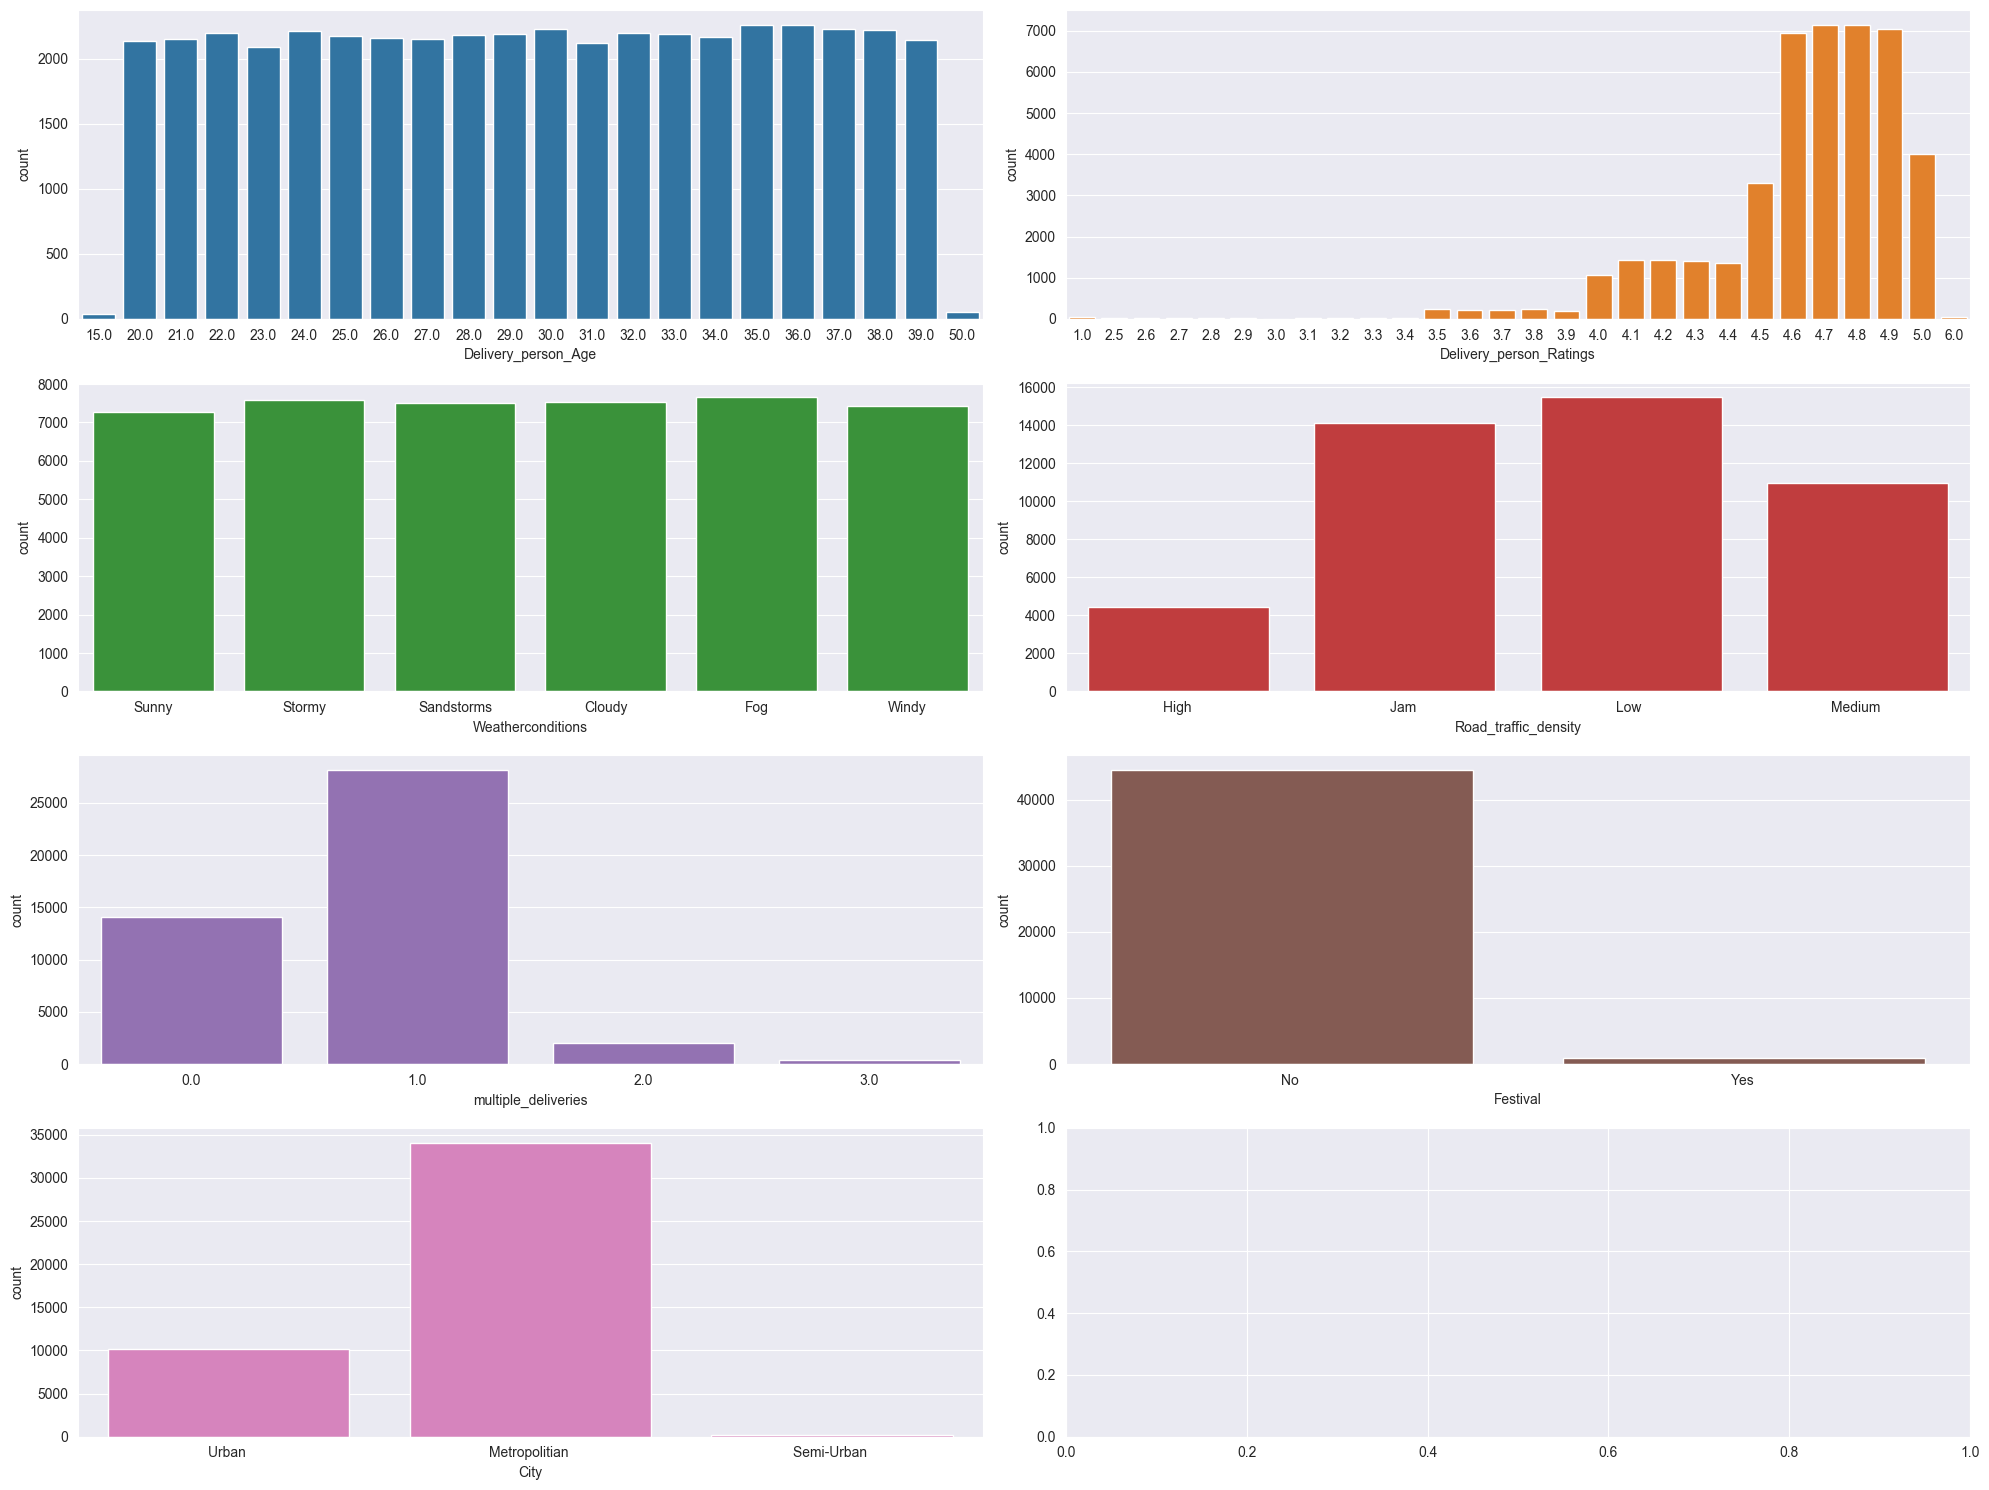

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(4, 2, figsize=(20,15))
columns = ['Delivery_person_Age','Delivery_person_Ratings','Weatherconditions','Road_traffic_density','multiple_deliveries','Festival','City']

for i, column in enumerate(columns):
    # every bar should have a random color
    color = sns.color_palette()[i]
    sns.countplot(x=column, data=df, ax=axs[i//2, i%2], color=color)

plt.tight_layout()
plt.show()

In [14]:
df["Weatherconditions"] = df["Weatherconditions"].fillna(df["Weatherconditions"].mode()[0])
df["Road_traffic_density"] = df["Road_traffic_density"].fillna(df["Road_traffic_density"].mode()[0])
df["City"] = df["City"].fillna(df["City"].mode()[0])
df["multiple_deliveries"] = df["multiple_deliveries"].fillna(df["multiple_deliveries"].mode()[0])
df["Festival"] = df["Festival"].fillna(df["Festival"].mode()[0])
df["Delivery_person_Age"] = df["Delivery_person_Age"].fillna(df["Delivery_person_Age"].mean())
df["Delivery_person_Ratings"] = df["Delivery_person_Ratings"].fillna(df["Delivery_person_Ratings"].mean())

In [15]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30


### Feature Engineering

In [16]:
from geopy.distance import geodesic

def give_distance(row):
    print(row['Restaurant_latitude'])
    restaurant = (row['Restaurant_latitude'], row['Restaurant_longitude'])
    customer = (row['Delivery_location_latitude'], row['Delivery_location_longitude'])
    distance = geodesic(restaurant, customer).km
    return distance

In [17]:
df['distance'] = df.apply(give_distance, axis=1)

22.745049
12.913041
12.914264
11.003669
12.972793
17.431668
23.369746
12.352058
17.433809
30.327968
10.003064
18.56245
30.899584
26.463504
19.176269
12.311072
18.592718
17.426228
22.552672
18.563934
23.357804
11.003669
12.986047
19.221315
13.005801
26.849596
21.160522
12.934179
18.51421
11.022477
21.160437
15.51315
15.561295
0.0
18.563934
18.55144
18.593481
21.173343
17.451976
12.972532
12.972532
13.064181
19.121999
21.149569
19.091458
22.539129
19.221315
12.970324
13.064181
21.175975
23.369746
12.914264
0.0
11.003681
21.173343
10.96185
27.165108
0.0
26.88842
0.0
26.913987
12.3085
21.183434
19.254567
18.55144
25.449659
30.372202
0.0
0.0
12.972793
21.157735
21.186438
0.0
0.0
12.935662
17.431477
0.0
13.064181
12.933298
22.311358
12.934365
0.0
13.086438
19.254567
26.913483
17.411028
18.516216
15.5696
19.876428
12.939496
17.433809
23.374878
-27.163303
22.74806
26.891191
21.160437
12.316967
18.927584
11.022298
12.325461
18.530963
17.458998
19.1813
11.022477
22.727021
12.979166
18.994237
12.

In [18]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),distance
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24,3.020737
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33,20.143737
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26,1.549693
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21,7.774497
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30,6.197898


In [19]:
df = df.drop(columns=["Restaurant_latitude", "Restaurant_longitude", "Delivery_location_latitude", "Delivery_location_longitude"])

In [20]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),distance
0,37.0,4.9,2022-03-19,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24,3.020737
1,34.0,4.5,2022-03-25,19:45:00,19:50:00,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33,20.143737
2,23.0,4.4,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26,1.549693
3,38.0,4.7,2022-04-05,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21,7.774497
4,32.0,4.6,2022-03-26,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30,6.197898


In [21]:
df["Time_Orderd"] = pd.to_timedelta(df["Time_Orderd"])
df["Time_Order_picked"] = pd.to_timedelta(df["Time_Order_picked"])

In [22]:
df["Order_DateTime"] = pd.to_datetime(df["Order_Date"] + df["Time_Orderd"])
df['Picked_DateTime'] = pd.to_datetime(df['Order_Date'] + np.where(df['Time_Order_picked'] < df['Time_Orderd'], pd.DateOffset(days=1), pd.DateOffset(days=0)) + df['Time_Order_picked'])

In [23]:
df["Prepare_time"] = (df["Picked_DateTime"] - df["Order_DateTime"]).dt.total_seconds() / 60
df['Prepare_time'].fillna(df['Prepare_time'].median(), inplace=True)

In [24]:
df = df.drop(columns=["Order_Date", "Time_Orderd", "Time_Order_picked", "Order_DateTime", "Picked_DateTime"])

In [25]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),distance,Prepare_time
0,37.0,4.9,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24,3.020737,15.0
1,34.0,4.5,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33,20.143737,5.0
2,23.0,4.4,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26,1.549693,15.0
3,38.0,4.7,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21,7.774497,10.0
4,32.0,4.6,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30,6.197898,15.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      45593 non-null  float64
 1   Delivery_person_Ratings  45593 non-null  float64
 2   Weatherconditions        45593 non-null  object 
 3   Road_traffic_density     45593 non-null  object 
 4   Vehicle_condition        45593 non-null  int64  
 5   Type_of_order            45593 non-null  object 
 6   Type_of_vehicle          45593 non-null  object 
 7   multiple_deliveries      45593 non-null  float64
 8   Festival                 45593 non-null  object 
 9   City                     45593 non-null  object 
 10  Time_taken(min)          45593 non-null  object 
 11  distance                 45593 non-null  float64
 12  Prepare_time             45593 non-null  float64
dtypes: float64(5), int64(1), object(7)
memory usage: 4.5+ MB


In [27]:
df["Time_taken(min)"] = df["Time_taken(min)"].astype(float)
df["multiple_deliveries"] = df["multiple_deliveries"].astype(int)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      45593 non-null  float64
 1   Delivery_person_Ratings  45593 non-null  float64
 2   Weatherconditions        45593 non-null  object 
 3   Road_traffic_density     45593 non-null  object 
 4   Vehicle_condition        45593 non-null  int64  
 5   Type_of_order            45593 non-null  object 
 6   Type_of_vehicle          45593 non-null  object 
 7   multiple_deliveries      45593 non-null  int64  
 8   Festival                 45593 non-null  object 
 9   City                     45593 non-null  object 
 10  Time_taken(min)          45593 non-null  float64
 11  distance                 45593 non-null  float64
 12  Prepare_time             45593 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 4.5+ MB


In [29]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),distance,Prepare_time
0,37.0,4.9,Sunny,High,2,Snack,motorcycle,0,No,Urban,24.0,3.020737,15.0
1,34.0,4.5,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33.0,20.143737,5.0
2,23.0,4.4,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26.0,1.549693,15.0
3,38.0,4.7,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21.0,7.774497,10.0
4,32.0,4.6,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30.0,6.197898,15.0


#### Data Encoding

In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode all columns the data type is object without using for loop
df_le = df.apply(lambda c: le.fit_transform(c) if c.dtype == 'object' else c)


In [31]:
df["Road_traffic_density"].unique()

array(['High ', 'Jam ', 'Low ', 'Medium '], dtype=object)

In [32]:
df["Road_traffic_density"] = df["Road_traffic_density"].apply(lambda x: x.strip())

In [33]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories=[["Low", "Medium", "High", "Jam"]])

df_oe = df.copy()
df_oe["Road_traffic_density"] = oe.fit_transform(df_oe[["Road_traffic_density"]]).astype(int)
df_oe.head()

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),distance,Prepare_time
0,37.0,4.9,Sunny,2,2,Snack,motorcycle,0,No,Urban,24.0,3.020737,15.0
1,34.0,4.5,Stormy,3,2,Snack,scooter,1,No,Metropolitian,33.0,20.143737,5.0
2,23.0,4.4,Sandstorms,0,0,Drinks,motorcycle,1,No,Urban,26.0,1.549693,15.0
3,38.0,4.7,Sunny,1,0,Buffet,motorcycle,1,No,Metropolitian,21.0,7.774497,10.0
4,32.0,4.6,Cloudy,2,1,Snack,scooter,1,No,Metropolitian,30.0,6.197898,15.0


In [34]:
df_ohe = df.copy()
df_ohe = pd.get_dummies(df_ohe, columns=["Festival", "City", "Type_of_vehicle"], dtype=int)


In [35]:
df_ohe.head()

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,multiple_deliveries,Time_taken(min),distance,Prepare_time,Festival_No,Festival_Yes,City_Metropolitian,City_Semi-Urban,City_Urban,Type_of_vehicle_bicycle,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter
0,37.0,4.9,Sunny,High,2,Snack,0,24.0,3.020737,15.0,1,0,0,0,1,0,0,1,0
1,34.0,4.5,Stormy,Jam,2,Snack,1,33.0,20.143737,5.0,1,0,1,0,0,0,0,0,1
2,23.0,4.4,Sandstorms,Low,0,Drinks,1,26.0,1.549693,15.0,1,0,0,0,1,0,0,1,0
3,38.0,4.7,Sunny,Medium,0,Buffet,1,21.0,7.774497,10.0,1,0,1,0,0,0,0,1,0
4,32.0,4.6,Cloudy,High,1,Snack,1,30.0,6.197898,15.0,1,0,1,0,0,0,0,0,1


In [36]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Delivery_person_Age                45593 non-null  float64
 1   Delivery_person_Ratings            45593 non-null  float64
 2   Weatherconditions                  45593 non-null  object 
 3   Road_traffic_density               45593 non-null  object 
 4   Vehicle_condition                  45593 non-null  int64  
 5   Type_of_order                      45593 non-null  object 
 6   multiple_deliveries                45593 non-null  int64  
 7   Time_taken(min)                    45593 non-null  float64
 8   distance                           45593 non-null  float64
 9   Prepare_time                       45593 non-null  float64
 10  Festival_No                        45593 non-null  int64  
 11  Festival_Yes                       45593 non-null  int

In [37]:
df_oe_ohe_le = df_oe.copy()

df_oe_ohe_le = df_oe_ohe_le.apply(lambda c: le.fit_transform(c) if c.dtype == 'object' else c)

In [38]:
df_oe_ohe_le.head()

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),distance,Prepare_time
0,37.0,4.9,4,2,2,3,2,0,0,2,24.0,3.020737,15.0
1,34.0,4.5,3,3,2,3,3,1,0,0,33.0,20.143737,5.0
2,23.0,4.4,2,0,0,1,2,1,0,2,26.0,1.549693,15.0
3,38.0,4.7,4,1,0,0,2,1,0,0,21.0,7.774497,10.0
4,32.0,4.6,0,2,1,3,3,1,0,0,30.0,6.197898,15.0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      45593 non-null  float64
 1   Delivery_person_Ratings  45593 non-null  float64
 2   Weatherconditions        45593 non-null  object 
 3   Road_traffic_density     45593 non-null  object 
 4   Vehicle_condition        45593 non-null  int64  
 5   Type_of_order            45593 non-null  object 
 6   Type_of_vehicle          45593 non-null  object 
 7   multiple_deliveries      45593 non-null  int64  
 8   Festival                 45593 non-null  object 
 9   City                     45593 non-null  object 
 10  Time_taken(min)          45593 non-null  float64
 11  distance                 45593 non-null  float64
 12  Prepare_time             45593 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 4.5+ MB


In [40]:
df_ohe_only = pd.get_dummies(df, columns=df.select_dtypes(include='object').columns, dtype=int)
df_ohe_only.head()

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,Time_taken(min),distance,Prepare_time,Weatherconditions_Cloudy,Weatherconditions_Fog,Weatherconditions_Sandstorms,...,Type_of_order_Snack,Type_of_vehicle_bicycle,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,Festival_No,Festival_Yes,City_Metropolitian,City_Semi-Urban,City_Urban
0,37.0,4.9,2,0,24.0,3.020737,15.0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
1,34.0,4.5,2,1,33.0,20.143737,5.0,0,0,0,...,1,0,0,0,1,1,0,1,0,0
2,23.0,4.4,0,1,26.0,1.549693,15.0,0,0,1,...,0,0,0,1,0,1,0,0,0,1
3,38.0,4.7,0,1,21.0,7.774497,10.0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
4,32.0,4.6,1,1,30.0,6.197898,15.0,1,0,0,...,1,0,0,0,1,1,0,1,0,0


### Model Building

#### Cross Validation

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import xgboost as xgb

min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

lr = LinearRegression()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
abr = AdaBoostRegressor()
gbr = GradientBoostingRegressor()
lgbr = LGBMRegressor(verbosity=-1)
xgbr = xgb.XGBRegressor()

isolated_models = [lr, dtr, rfr, abr, gbr, lgbr]

params = {
    'objective': 'reg:squarederror',  # Regression objective
    'eval_metric': 'rmse',           # Root Mean Square Error
    'max_depth': 6,
    'eta': 0.3
}

def get_cross_val_score(x, y, cv):
    x_min_max = min_max_scaler.fit_transform(x)
    x_standard = standard_scaler.fit_transform(x)

    dfs = ((x, "Not Scaled"), (x_standard, "Standard Scaled"), (x_min_max, "Min Max Scaled"))
    results = []

    def _cross_validation(x_data, y_data, label):
        dtrain = xgb.DMatrix(data=x_data, label=y_data)
        cv_results = xgb.cv(
            params=params,
            dtrain=dtrain,
            nfold=5,            # Number of folds
            seed=42,
            metrics="rmse",     # Metric for evaluation
            as_pandas=True      # Return results as a pandas DataFrame
        )

        mean_rmse = np.mean(cv_results['test-rmse-mean'])
        results.append({mean_rmse: f'Model: XGBoost ({label}) \nMean RMSE: {mean_rmse}\n'})

        for model in isolated_models:
            scores = cross_val_score(model, x, y, cv=cv, scoring='neg_root_mean_squared_error')
            results.append({-scores.mean(): f"Model: ({label}) {model.__class__.__name__}\nMean RMSE: {-scores.mean():.2f}"})

    for df in dfs:
        _cross_validation(df[0], y, df[1])

    orders_result = sorted(results, key=lambda d: list(d.keys())[0])

    for result in orders_result:
        for k in result:
            print(result[k])
            print()

##### Cross Validation Using Label Encoded Data

In [42]:
# x = df_le.drop(columns=["Time_taken(min)"])
# y = df_le["Time_taken(min)"]
# 
# get_cross_val_score(x, y, 5)

##### Cross Validation Using One Hot Encoded Data

In [43]:
# x = df_ohe_only.drop(columns=["Time_taken(min)"])
# y = df_ohe_only["Time_taken(min)"]
# 
# get_cross_val_score(x, y, 5)

In [44]:
x = df_le.drop(columns=["Time_taken(min)"])
y = df_le["Time_taken(min)"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

##### Testing Model Accuracy Without Cross Validation

In [45]:
for model in isolated_models:
    print(model)
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    print(f"Accuracy: {score}")

LinearRegression()
Accuracy: 0.42532880966843334
DecisionTreeRegressor()
Accuracy: 0.6591289405495655
RandomForestRegressor()
Accuracy: 0.8140662514268626
AdaBoostRegressor()
Accuracy: 0.6059045306665853
GradientBoostingRegressor()
Accuracy: 0.7763208171020373
LGBMRegressor(verbosity=-1)
Accuracy: 0.8246880069111429


#### Hyper Parameter Tuning

In [46]:
from sklearn.model_selection import GridSearchCV

##### For Random Forest

In [47]:
params_grid = {
    'n_estimators': [200, 150],
    'max_depth': [None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

grid_search = GridSearchCV(rfr, param_grid=params_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)
best_rfr = grid_search.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
0.8139086467594486


##### For LightGBM

In [48]:
params_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 15],
    'min_child_samples': [20, 40, 60],
    'learning_rate': [0.1, 0.01, 0.001]
}

grid_search = GridSearchCV(lgbr, param_grid=params_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)
# best_lgbr = grid_search.best_estimator_

Fitting 5 folds for each of 81 candidates, totalling 405 fits
{'learning_rate': 0.1, 'max_depth': 15, 'min_child_samples': 20, 'n_estimators': 150}
0.827018366522412


#### Ensemble Models

##### Bagging

In [49]:
bagging_dtr = BaggingRegressor(estimator=dtr, n_estimators=10, random_state=42)
bagging_dtr.fit(x_train, y_train)

# Predictions and Evaluation
y_pred = bagging_dtr.predict(x_test)
score = bagging_dtr.score(x_test, y_test)
print("Bagging Regressor MSE:", root_mean_squared_error(y_test, y_pred))
print("Bagging Regressor Score:", score)

Bagging Regressor MSE: 4.180296499583792
Bagging Regressor Score: 0.8006928582608358


In [50]:
bagging_rfr = BaggingRegressor(estimator=rfr, n_estimators=10, random_state=42)
bagging_rfr.fit(x_train, y_train)

# Predictions and Evaluation
y_pred = bagging_rfr.predict(x_test)
score = bagging_rfr.score(x_test, y_test)
print("Bagging Regressor MSE:", root_mean_squared_error(y_test, y_pred))
print("Bagging Regressor Score:", score)

Bagging Regressor MSE: 3.9549583528338843
Bagging Regressor Score: 0.8216009582750081


In [52]:
bagging_xgbr = BaggingRegressor(estimator=xgbr, n_estimators=10, random_state=42)
bagging_xgbr.fit(x_train, y_train)

# Predictions and Evaluation
y_pred = bagging_xgbr.predict(x_test)
score = bagging_xgbr.score(x_test, y_test)
print("Bagging Regressor MSE:", root_mean_squared_error(y_test, y_pred))
print("Bagging Regressor Score:", score)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [53]:
bagging_abr = BaggingRegressor(estimator=abr, n_estimators=10, random_state=42)
bagging_abr.fit(x_train, y_train)

# Predictions and Evaluation
y_pred = bagging_abr.predict(x_test)
score = bagging_abr.score(x_test, y_test)
print("Bagging Regressor MSE:", root_mean_squared_error(y_test, y_pred))
print("Bagging Regressor Score:", score)

Bagging Regressor MSE: 5.82111634012233
Bagging Regressor Score: 0.6135251419626804


In [54]:
bagging_lr = BaggingRegressor(estimator=lr, n_estimators=10, random_state=42)
bagging_lr.fit(x_train, y_train)

# Predictions and Evaluation
y_pred = bagging_lr.predict(x_test)
score = bagging_lr.score(x_test, y_test)
print("Bagging Regressor MSE:", root_mean_squared_error(y_test, y_pred))
print("Bagging Regressor Score:", score)

Bagging Regressor MSE: 7.098170505721296
Bagging Regressor Score: 0.42535247202918025


In [55]:
bagging_gbr = BaggingRegressor(estimator=gbr, n_estimators=10, random_state=42)
bagging_gbr.fit(x_train, y_train)

# Predictions and Evaluation
y_pred = bagging_gbr.predict(x_test)
score = bagging_gbr.score(x_test, y_test)
print("Bagging Regressor MSE:", root_mean_squared_error(y_test, y_pred))
print("Bagging Regressor Score:", score)

Bagging Regressor MSE: 4.468976204108706
Bagging Regressor Score: 0.7722151831913879


In [56]:
bagging_lgbr = BaggingRegressor(estimator=lgbr, n_estimators=10, random_state=42)
bagging_lgbr.fit(x_train, y_train)

# Predictions and Evaluation
y_pred = bagging_lgbr.predict(x_test)
score = bagging_lgbr.score(x_test, y_test)
print("Bagging Regressor MSE:", root_mean_squared_error(y_test, y_pred))
print("Bagging Regressor Score:", score)

Bagging Regressor MSE: 3.9288332553277128
Bagging Regressor Score: 0.8239500595694236


In [57]:
bagging_models = [bagging_dtr, bagging_rfr, bagging_lgbr]

In [58]:
# Define a list of regressors
voting_regressor = VotingRegressor(estimators=[
    ('rfr', rfr),
    ('lgbr', lgbr),
])

# Train the Voting Regressor
voting_regressor.fit(x_train, y_train)

# Predictions and Evaluation
y_pred = voting_regressor.predict(x_test)
score = voting_regressor.score(x_test, y_test)
print("Voting Regressor MSE:", mean_squared_error(y_test, y_pred))
print("Voting Regressor Score:", score)

Voting Regressor MSE: 15.18209864455363
Voting Regressor Score: 0.8268428229546657


In [59]:
# Define a list of regressors
bagged_voting_regressor = VotingRegressor(estimators=[
    ('bg_rfr', bagging_rfr),
    ('bg_lgbr', bagging_lgbr),
])

# Train the Voting Regressor
bagged_voting_regressor.fit(x_train, y_train)

# Predictions and Evaluation
y_pred = bagged_voting_regressor.predict(x_test)
score = bagged_voting_regressor.score(x_test, y_test)
print("Voting Regressor MSE:", mean_squared_error(y_test, y_pred))
print("Voting Regressor Score:", score)

Voting Regressor MSE: 15.09729731801232
Voting Regressor Score: 0.8278100119222371


#### Stacking

In [60]:
# Define base models
base_models = [
    ('lr', lr),
    ('dtr', dtr),
    ('rfr', rfr),
    ('abr', abr),
    ('gbr', gbr),
    ('lgbr', lgbr),
]

# Define a meta-model (e.g., LinearRegression)
meta_model = LinearRegression()

# Create Stacking Regressor
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model, passthrough=False)

# Train the Stacking Regressor
stacking_regressor.fit(x_train, y_train)

# Predictions and Evaluation
y_pred = stacking_regressor.predict(x_test)
score = stacking_regressor.score(x_test, y_test)
print("Stacking Regressor MSE:", mean_squared_error(y_test, y_pred))
print("Stacking Regressor Score:", score)

Stacking Regressor MSE: 15.079729547740223
Stacking Regressor Score: 0.8280103785236218


In [61]:
# Define base models
base_models = [
    ('dtr', dtr),
    ('rfr', rfr),
    ('lgbr', lgbr),
]

# Define a meta-model (e.g., LinearRegression)
meta_model = RandomForestRegressor()

# Create Stacking Regressor
stacking_regressor_1 = StackingRegressor(estimators=base_models, final_estimator=meta_model, passthrough=False)

# Train the Stacking Regressor
stacking_regressor_1.fit(x_train, y_train)

# Predictions and Evaluation
y_pred = stacking_regressor_1.predict(x_test)
score = stacking_regressor_1.score(x_test, y_test)
print("Stacking Regressor MSE:", mean_squared_error(y_test, y_pred))
print("Stacking Regressor Score:", score)

Stacking Regressor MSE: 16.76890937876656
Stacking Regressor Score: 0.8087446881925052


In [62]:
# Define base models
base_models = [
    ('dtr', dtr),
    ('rfr', rfr),
    ('lgbr', lgbr),
]

# Define a meta-model (e.g., LinearRegression)
meta_model = LGBMRegressor()

# Create Stacking Regressor
stacking_regressor_2 = StackingRegressor(estimators=base_models, final_estimator=meta_model, passthrough=False)

# Train the Stacking Regressor
stacking_regressor_2.fit(x_train, y_train)

# Predictions and Evaluation
y_pred = stacking_regressor_2.predict(x_test)
score = stacking_regressor_2.score(x_test, y_test)
print("Stacking Regressor MSE:", mean_squared_error(y_test, y_pred))
print("Stacking Regressor Score:", score)

Stacking Regressor MSE: 15.143981883718514
Stacking Regressor Score: 0.8272775580238314


In [63]:
# Define base models
base_models = [
    ('bg_rfr', bagging_rfr),
    ('bg_lgbr', bagging_lgbr),
]

# Define a meta-model (e.g., LinearRegression)
meta_model = LGBMRegressor()

# Create Stacking Regressor
stacking_regressor_3 = StackingRegressor(estimators=base_models, final_estimator=meta_model, passthrough=False)

# Train the Stacking Regressor
stacking_regressor_3.fit(x_train, y_train)

# Predictions and Evaluation
y_pred = stacking_regressor_3.predict(x_test)
score = stacking_regressor_3.score(x_test, y_test)
print("Stacking Regressor MSE:", mean_squared_error(y_test, y_pred))
print("Stacking Regressor Score:", score)

Stacking Regressor MSE: 15.166452052757343
Stacking Regressor Score: 0.827021277839544


In [64]:
# Define base models
base_models = [
    ('lr', lr),
    ('dtr', dtr),
    ('rfr', rfr),
    ('abr', abr),
    ('gbr', gbr),
    ('lgbr', lgbr),
]

# Define a meta-model (e.g., LinearRegression)
meta_model = RandomForestRegressor()

# Create Stacking Regressor
stacking_regressor_r = StackingRegressor(estimators=base_models, final_estimator=meta_model, passthrough=False)

# Train the Stacking Regressor
stacking_regressor_r.fit(x_train, y_train)

# Predictions and Evaluation
y_pred = stacking_regressor_r.predict(x_test)
score = stacking_regressor_r.score(x_test, y_test)
print("Stacking Regressor MSE:", mean_squared_error(y_test, y_pred))
print("Stacking Regressor Score:", score)

Stacking Regressor MSE: 15.683459728750108
Stacking Regressor Score: 0.821124623379471


In [65]:
base_models = [
    ('lr', lr),
    ('dtr', dtr),
    ('rfr', rfr),
    ('abr', abr),
    ('gbr', gbr),
    ('lgbr', lgbr),
]

# Define a meta-model (e.g., LinearRegression)
meta_model = LGBMRegressor()

# Create Stacking Regressor
stacking_regressor_lgb = StackingRegressor(estimators=base_models, final_estimator=meta_model, passthrough=False)

# Train the Stacking Regressor
stacking_regressor_lgb.fit(x_train, y_train)

# Predictions and Evaluation
y_pred = stacking_regressor_lgb.predict(x_test)
score = stacking_regressor_lgb.score(x_test, y_test)
print("Stacking Regressor MSE:", mean_squared_error(y_test, y_pred))
print("Stacking Regressor Score:", score)

Stacking Regressor MSE: 14.961420496405616
Stacking Regressor Score: 0.8293597348825572


In [66]:
base_models = [
    ('lr', lr),
    ('dtr', dtr),
    ('bg_rfr', bagging_rfr),
    ('bg_lgbr', bagging_lgbr),
    ('abr', abr),
    ('gbr', gbr),
]

# Define a meta-model (e.g., LinearRegression)
meta_model = LGBMRegressor()

# Create Stacking Regressor
stacking_regressor_lgb = StackingRegressor(estimators=base_models, final_estimator=meta_model, passthrough=False)

# Train the Stacking Regressor
stacking_regressor_lgb.fit(x_train, y_train)

# Predictions and Evaluation
y_pred = stacking_regressor_lgb.predict(x_test)
score = stacking_regressor_lgb.score(x_test, y_test)
print("Stacking Regressor MSE:", mean_squared_error(y_test, y_pred))
print("Stacking Regressor Score:", score)

Stacking Regressor MSE: 15.036124633836012
Stacking Regressor Score: 0.8285077079096133


In [70]:
base_models = [
    ('lr', lr),
    ('dtr', dtr),
    ('rfr', rfr),
    ('lgbr', lgbr),
]

# Define a meta-model (e.g., LinearRegression)
meta_model = GradientBoostingRegressor()

# Create Stacking Regressor
stacking_regressor_lgb_1 = StackingRegressor(estimators=base_models, final_estimator=meta_model, passthrough=False)

# Train the Stacking Regressor
stacking_regressor_lgb_1.fit(x_train, y_train)

# Predictions and Evaluation
y_pred = stacking_regressor_lgb_1.predict(x_test)
score = stacking_regressor_lgb_1.score(x_test, y_test)
print("Stacking Regressor MSE:", mean_squared_error(y_test, y_pred))
print("Stacking Regressor Score:", score)

Stacking Regressor MSE: 15.029933482012323
Stacking Regressor Score: 0.8285783201745938
